In [1]:
import numpy as np

In [2]:
from classes.model import Model
from classes.scenario import Scenario
from classes.setup import Setup
from classes.map import Map

setup = Setup()
pathway_maps = Map({'setup': setup})

# Scenario overwrites default values
scenario = Scenario({
    "setup": setup,
    'name': 'drip-and-ship',
    # 'select_lsoa_method': 'nearest',
    "run_duration": 5,  # years
    # "mt_hub_postcodes":['PL68DH', 'BS105NB'],
    # "services_updates":services_updates,
    # "region_type_for_lsoa_selection":'ICB'
})



REHOME THIS PLEASE

        # If the model type is "mothership" or "MSU"
        # then remove the IVT units.
        # destination_decision_type = 0 is 'drip-and-ship'
        if int(self.destination_decision_type) == 1:
            mask = (services['Use_MT'] == 0)
            services['Use_IVT'][mask] = 0
        elif int(self.destination_decision_type) == 2:
            # TO DO - this is temporary, might not want this in
            # final MSU model:
            mask = (services['Use_MSU'] == 0)
            services['Use_IVT'][mask] = 0

### Set up the areas

In [3]:
df_areas = scenario.get_model_areas()

In [4]:
df_areas

,region,region_code,region_type,ICB22CD,ICB22NM,ISDN,selected
0,NHS Cheshire and Merseyside ICB - 01F,E38000068,LOC22NM,E54000008,NHS Cheshire and Merseyside Integrated Care Board,Cheshire and Merseyside,0
1,NHS Cheshire and Merseyside ICB - 02E,E38000194,LOC22NM,E54000008,NHS Cheshire and Merseyside Integrated Care Board,Cheshire and Merseyside,0
2,NHS Cheshire and Merseyside ICB - 27D,E38000233,LOC22NM,E54000008,NHS Cheshire and Merseyside Integrated Care Board,Cheshire and Merseyside,0
3,NHS Cheshire and Merseyside ICB - 01J,E38000091,LOC22NM,E54000008,NHS Cheshire and Merseyside Integrated Care Board,Cheshire and Merseyside,0
4,NHS Cheshire and Merseyside ICB - 99A,E38000101,LOC22NM,E54000008,NHS Cheshire and Merseyside Integrated Care Board,Cheshire and Merseyside,0
...,...,...,...,...,...,...,...
108,Hywel Dda University Health Board,W11000025,LHB20NM,NaN,NaN,NaN,0
109,Swansea Bay University Health Board,W11000031,LHB20NM,NaN,NaN,NaN,0
110,Cwm Taf Morgannwg University Health Board,W11000030,LHB20NM,NaN,NaN,NaN,0
111,Aneurin Bevan University Health Board,W11000028,LHB20NM,NaN,NaN,NaN,0


In [5]:
row_mask = df_areas['ISDN'].isin([
    'Devon, Cornwall and Isles of Scilly',
    'Gloucester, BSW, BNSSG and Somerset'
])

In [6]:
df_areas.loc[row_mask, 'selected'] = 1

In [7]:
df_areas[df_areas['selected'] == 1]

,region,region_code,region_type,ICB22CD,ICB22NM,ISDN,selected
42,NHS Cornwall and the Isles of Scilly ICB - 11N,E38000089,LOC22NM,E54000036,NHS Cornwall and the Isles of Scilly Integrate...,"Devon, Cornwall and Isles of Scilly",1
43,NHS Devon ICB - 15N,E38000230,LOC22NM,E54000037,NHS Devon Integrated Care Board,"Devon, Cornwall and Isles of Scilly",1
44,NHS Somerset ICB - 11X,E38000150,LOC22NM,E54000038,NHS Somerset Integrated Care Board,"Gloucester, BSW, BNSSG and Somerset",1
45,"NHS Bristol, North Somerset and South Gloucest...",E38000222,LOC22NM,E54000039,"NHS Bristol, North Somerset and South Gloucest...","Gloucester, BSW, BNSSG and Somerset",1
46,"NHS Bath and North East Somerset, Swindon and ...",E38000231,LOC22NM,E54000040,"NHS Bath and North East Somerset, Swindon and ...","Gloucester, BSW, BNSSG and Somerset",1
50,NHS Gloucestershire ICB - 11M,E38000062,LOC22NM,E54000043,NHS Gloucestershire Integrated Care Board,"Gloucester, BSW, BNSSG and Somerset",1


In [8]:
# Print lists of all ICBs:
print(df_areas['ICB22NM'].dropna().unique())

['NHS Cheshire and Merseyside Integrated Care Board'
 'NHS Staffordshire and Stoke-on-Trent Integrated Care Board'
 'NHS Shropshire, Telford and Wrekin Integrated Care Board'
 'NHS Lincolnshire Integrated Care Board'
 'NHS Leicester, Leicestershire and Rutland Integrated Care Board'
 'NHS Coventry and Warwickshire Integrated Care Board'
 'NHS Herefordshire and Worcestershire Integrated Care Board'
 'NHS Norfolk and Waveney Integrated Care Board'
 'NHS Suffolk and North East Essex Integrated Care Board'
 'NHS Bedfordshire, Luton and Milton Keynes Integrated Care Board'
 'NHS Hertfordshire and West Essex Integrated Care Board'
 'NHS Mid and South Essex Integrated Care Board'
 'NHS North West London Integrated Care Board'
 'NHS North Central London Integrated Care Board'
 'NHS North East London Integrated Care Board'
 'NHS South East London Integrated Care Board'
 'NHS South West London Integrated Care Board'
 'NHS Kent and Medway Integrated Care Board'
 'NHS Frimley Integrated Care Board

In [9]:
# Print lists of all LHBs:
print(df_areas['region'][df_areas['region_type'] == 'LHB20NM'].dropna().unique())

['Betsi Cadwaladr University Health Board' 'Powys Teaching Health Board'
 'Hywel Dda University Health Board' 'Swansea Bay University Health Board'
 'Cwm Taf Morgannwg University Health Board'
 'Aneurin Bevan University Health Board'
 'Cardiff and Vale University Health Board']


In [10]:
# Print lists of all ICBs:
print(df_areas['ISDN'].dropna().unique())

['Cheshire and Merseyside' 'North Midlands' 'East Midlands'
 'West Midlands' 'East of England (North)' 'East of England (South)'
 'London' 'Kent and Medway' 'Frimley ICS'
 'Devon, Cornwall and Isles of Scilly'
 'Gloucester, BSW, BNSSG and Somerset' 'Wessex' 'Thames Valley'
 'Lancashire and South Cumbria' 'North East and Cumbria'
 'Humber Coast and Vale' 'Sussex' 'West Yorkshire and Harrogate'
 'Greater Manchester' 'South Yorkshire']


In [11]:
scenario.set_model_areas(df_areas)

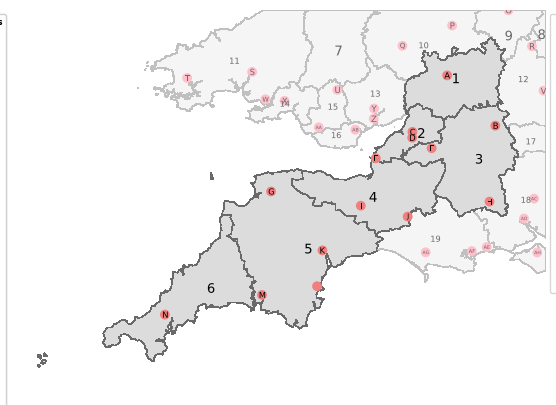

In [12]:
pathway_maps.plot_map_selected_regions(scenario=scenario.name, show=True)

### Set up the units

In [13]:
df_units = scenario.get_unit_services()

The above function automatically sets "selected" units to be those in the selected model areas.

In [14]:
df_units[df_units['selected'] == 1]

,Postcode,Hospital_name,use_ivt,use_mt,use_msu,chosen_mt,region,region_type,ICB22NM,ISDN,selected,Easting,Northing,long_x,lat_x
101,GL13NN,GL13NN,1,0,0,nearest,NHS Gloucestershire ICB - 11M,LOC22NM,NHS Gloucestershire Integrated Care Board,"Gloucester, BSW, BNSSG and Somerset",1,384117,218670,-2.232073,51.866379
102,SN36BB,SN36BB,1,0,0,nearest,"NHS Bath and North East Somerset, Swindon and ...",LOC22NM,"NHS Bath and North East Somerset, Swindon and ...","Gloucester, BSW, BNSSG and Somerset",1,419017,182216,-1.727200,51.538528
103,BS105NB,BS105NB,1,1,1,nearest,"NHS Bristol, North Somerset and South Gloucest...",LOC22NM,"NHS Bristol, North Somerset and South Gloucest...","Gloucester, BSW, BNSSG and Somerset",1,358934,177759,-2.592962,51.497270
104,EX314JB,EX314JB,1,0,0,nearest,NHS Devon ICB - 15N,LOC22NM,NHS Devon Integrated Care Board,"Devon, Cornwall and Isles of Scilly",1,256506,134540,-4.050431,51.092169
105,PL68DH,PL68DH,1,1,1,nearest,NHS Devon ICB - 15N,LOC22NM,NHS Devon Integrated Care Board,"Devon, Cornwall and Isles of Scilly",1,249930,59564,-4.113684,50.416720
106,TR13LQ,TR13LQ,1,0,0,nearest,NHS Cornwall and the Isles of Scilly ICB - 11N,LOC22NM,NHS Cornwall and the Isles of Scilly Integrate...,"Devon, Cornwall and Isles of Scilly",1,179581,45313,-5.094263,50.266557
107,EX25DW,EX25DW,1,0,0,nearest,NHS Devon ICB - 15N,LOC22NM,NHS Devon Integrated Care Board,"Devon, Cornwall and Isles of Scilly",1,293730,91869,-3.506680,50.716703
108,BA13NG,BA13NG,1,0,0,nearest,"NHS Bath and North East Somerset, Swindon and ...",LOC22NM,"NHS Bath and North East Somerset, Swindon and ...","Gloucester, BSW, BNSSG and Somerset",1,372876,165920,-2.391218,51.391665
109,SP28BJ,SP28BJ,1,0,0,nearest,"NHS Bath and North East Somerset, Swindon and ...",LOC22NM,"NHS Bath and North East Somerset, Swindon and ...","Gloucester, BSW, BNSSG and Somerset",1,414831,127198,-1.789823,51.043946
110,TA15DA,TA15DA,1,0,0,nearest,NHS Somerset ICB - 11X,LOC22NM,NHS Somerset Integrated Care Board,"Gloucester, BSW, BNSSG and Somerset",1,321550,124217,-3.119650,51.011962


In [15]:
scenario.set_unit_services(df_units)

/home/anna/stroke-modelling/simpy-pathway-model/classes/map.py:1362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_lines_transfer['Use'][(


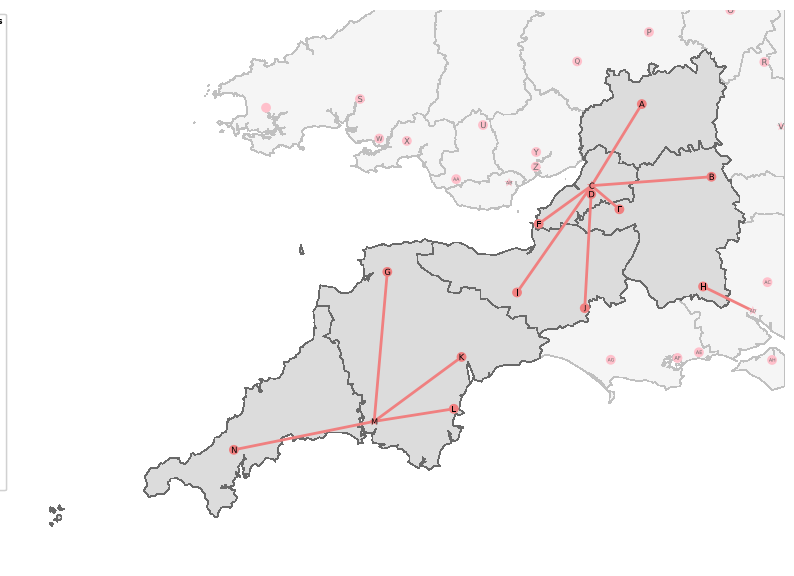

In [16]:
pathway_maps.plot_map_selected_units(scenario=scenario.name, show=True)

## LSOA catchment

In [17]:
scenario.find_lsoa_by_catchment()

In [18]:
scenario.lsoa_travel_by_catchment

,LSOA11CD,postcode_nearest_ivt,time_nearest_ivt
LSOA11NM,,,
Basingstoke and Deane 003C,E01022499,SN36BB,35.9
Bath and North East Somerset 001A,E01014399,BA13NG,19.8
Bath and North East Somerset 001B,E01014400,BA13NG,17.6
Bath and North East Somerset 001C,E01014401,BA13NG,18.7
Bath and North East Somerset 002A,E01014402,BA13NG,20.8
...,...,...,...
Wiltshire 062E,E01031995,SP28BJ,13.3
Wychavon 019A,E01032347,GL13NN,27.3
Wychavon 019B,E01032348,GL13NN,27.3


In [19]:
scenario.find_lsoa_by_region_island()

In [20]:
scenario.lsoa_travel_by_region_island

,LSOA11CD,postcode_nearest_ivt,time_nearest_ivt
LSOA11NM,,,
Cornwall 013A,E01018750,PL68DH,24.1
Cornwall 013B,E01018751,PL68DH,24.1
Cornwall 013C,E01018752,PL68DH,26.2
Cornwall 010A,E01018753,PL68DH,27.3
Cornwall 010B,E01018754,PL68DH,28.4
...,...,...,...
Tewkesbury 003D,E01022465,GL13NN,30.5
Tewkesbury 003E,E01022466,GL13NN,34.8
Tewkesbury 001F,E01032938,GL13NN,21.9


/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/anna/stroke-modelling/simpy-pathway-model/classes/map.py:1593: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

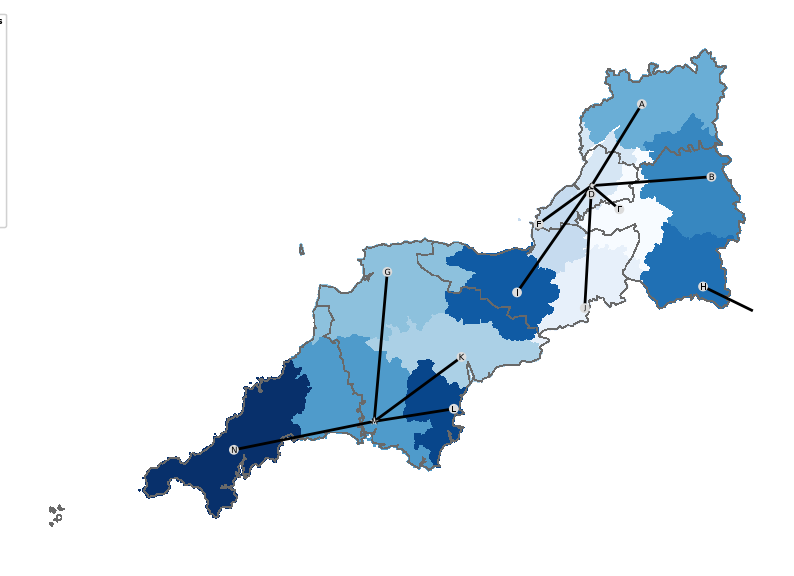

In [29]:
scenario.set_lsoa_catchment_type('island')

pathway_maps.plot_map_catchment(
    scenario='drip-and-ship', catchment_type='island', show=True)

/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/anna/stroke-modelling/simpy-pathway-model/classes/map.py:1593: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

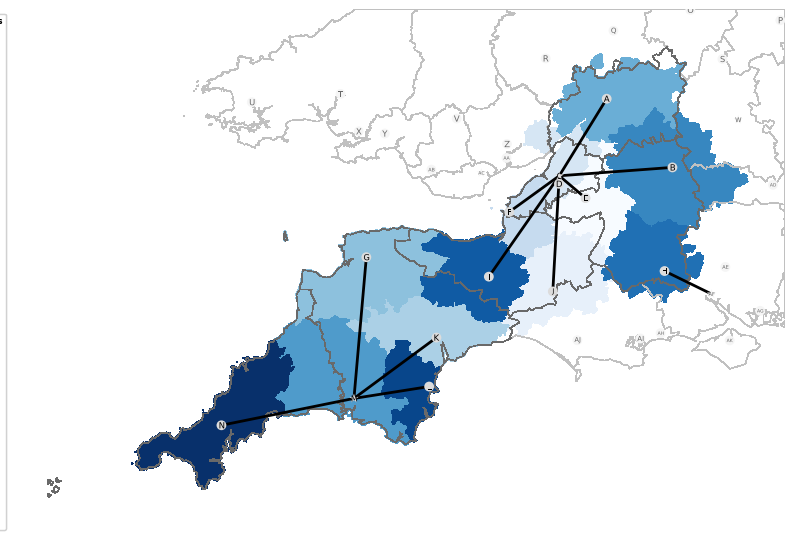

In [30]:
scenario.set_lsoa_catchment_type('catchment')

pathway_maps.plot_map_catchment(
    scenario='drip-and-ship', catchment_type='catchment', show=True)

In [23]:
pathway_maps.data_type

'single'

In [24]:
setup.save_to_file()

## Run outcome results

In [25]:
scenario._create_lsoa_travel_dicts()
scenario._load_admissions()

In [26]:
model = Model(scenario)

model.run()

/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


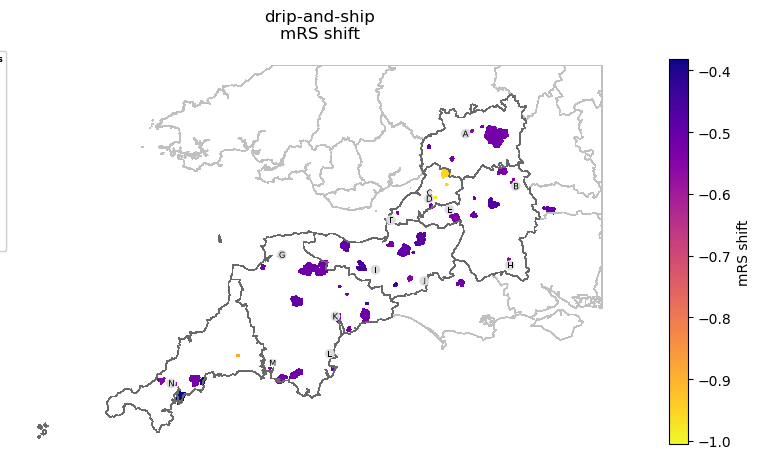

/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


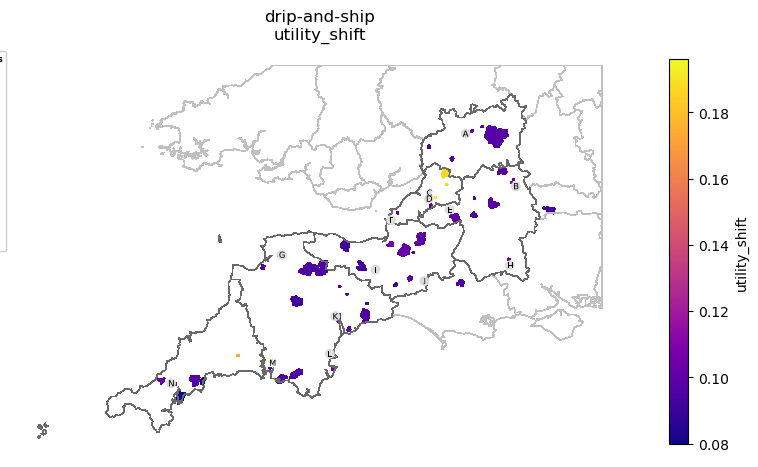

/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


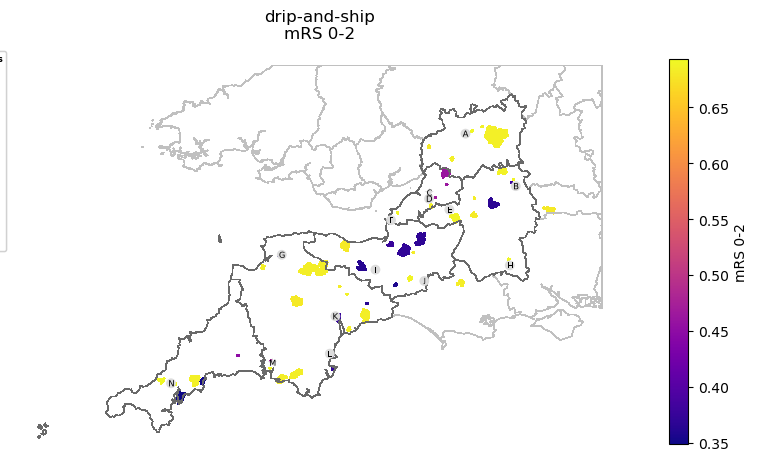

In [27]:
for outcome in ['mRS shift', 'utility_shift', 'mRS 0-2']:
    pathway_maps.plot_map_outcome(scenario='drip-and-ship', outcome=outcome, show=True)

In [28]:
print(stop, here, please)

NameError: name 'stop' is not defined

In [ ]:
from classes.model import Model
from classes.scenario import Scenario
from classes.setup import Setup

setup = Setup()

services_updates = {
    'PL68DH': {'Use_MSU': 0},  # No MSU for Derriford.
    'TQ27AA': {'Use_IVT': 0},  # No IVT for Torquay.
    # 'EX25DW': {'Nearest_MT': 'SW170QT'},  # Crazy value to show that it works.
}

# Scenario overwrites default values
scenario = Scenario({
    "setup": setup,
    'name': 'drip-and-ship',
    'select_lsoa_method': 'nearest',
    "run_duration": 5,  # years
    "mt_hub_postcodes":['PL68DH', 'BS105NB'],
    "services_updates":services_updates,
    "region_type_for_lsoa_selection":'ICB'
})

model = Model(scenario)

model.run()

from classes.map import plot_map_selected_units, plot_map_catchment, plot_map_outcome
# plot_map_selected_units(
#     setup, col=scenario.region_column_for_lsoa_selection)
# # TEMPORARILY commented out for speed of running. 29th Jan 2024
# # plot_map_catchment(
# #     setup, col=scenario.region_column_for_lsoa_selection)
plot_map_outcome(
    setup, col=scenario.region_column_for_lsoa_selection,
    outcome='mrs_shift', destination_type=scenario.destination_decision_type
)


In [ ]:
model.results_all

In [ ]:
completed_patients_keys = model.pathway.completed_patients[0].keys()
time_cols = [x for x in completed_patients_keys if x[0:4] == 'time']
time_cols.remove('time_onset')

In [ ]:
model.results_summary_all

In [ ]:
model.results_summary_by_admitting_unit

In [ ]:
model.results_all[np.isnan(model.results_all['time_puncture']) == False]

In [ ]:
model.results_all[np.isnan(model.results_all['time_needle']) == False]